In [5]:
from model import NeuralNetwork
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from persistable_model import PresistableModel


In [2]:
# useiden eri mnist datasettien jälkeen päädyin tähän pikkelöityyn
# https://www.kaggle.com/datasets/pablotab/mnistpklgz
from utilities import vectorize_label


with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
    train_set, val_set, test_set = pickle.load(f, encoding='latin1')

X_train = [np.reshape(x, (784, 1)) for x in train_set[0]]
y_train = [vectorize_label(y) for y in train_set[1]]
X_val = [np.reshape(x, (784, 1)) for x in val_set[0]]
y_val = val_set[1]
X_test = [np.reshape(x, (784, 1)) for x in test_set[0]]
y_test = test_set[1]

In [3]:
def evalulate_model(m):
    results = []
    for x, y in zip(X_test, y_test):
        prediction, _, __ = m.predict(x)
        results.append(prediction == y)
    
    correct_predictions_count = np.array(results).sum()
    accuracy =  correct_predictions_count / len(results)
    
    print("Predicted {}/{} correct".format(correct_predictions_count, len(results)))
    print("Accuracy: {}".format(accuracy))

Epoch 0 done
Predicted 9326/10000
Epoch 1 done
Predicted 9407/10000
Epoch 2 done
Predicted 9511/10000
Epoch 3 done
Predicted 9549/10000
Epoch 4 done
Predicted 9568/10000
Epoch 5 done
Predicted 9567/10000
Epoch 6 done
Predicted 9531/10000
Epoch 7 done
Predicted 9589/10000
Epoch 8 done
Predicted 9583/10000
Epoch 9 done
Predicted 9582/10000
Epoch 10 done
Predicted 9619/10000
Epoch 11 done
Predicted 9604/10000
Epoch 12 done
Predicted 9625/10000
Epoch 13 done
Predicted 9582/10000
Epoch 14 done
Predicted 9594/10000
Epoch 15 done
Predicted 9614/10000
Epoch 16 done
Predicted 9637/10000
Epoch 17 done
Predicted 9637/10000
Epoch 18 done
Predicted 9635/10000
Epoch 19 done
Predicted 9644/10000
Epoch 20 done
Predicted 9637/10000
Epoch 21 done
Predicted 9612/10000
Epoch 22 done
Predicted 9587/10000
Epoch 23 done
Predicted 9620/10000
Epoch 24 done
Predicted 9597/10000
Epoch 25 done
Predicted 9618/10000
Epoch 26 done
Predicted 9625/10000
Epoch 27 done
Predicted 9554/10000
Epoch 28 done
Predicted 9576/1

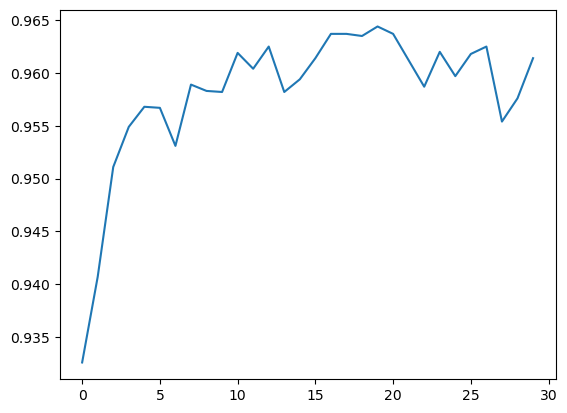

Predicted 9563/10000 correct
Accuracy: 0.9563


In [10]:
model = NeuralNetwork([784, 30, 16, 10])
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 2.0, 10)
plt.plot(range(len(evaluations)), evaluations)
plt.show()

# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

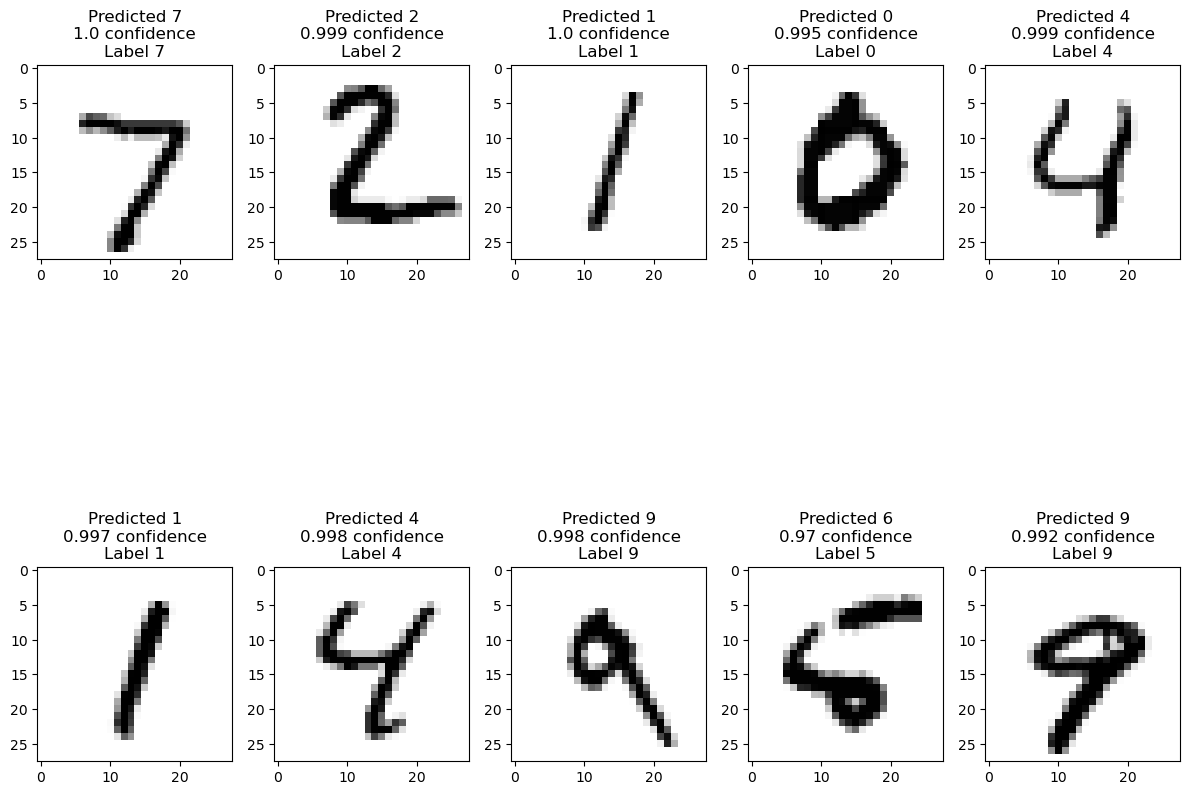

In [11]:
n_prediction = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 12))

def image_vector_to_matrix(v):
    n = int(np.sqrt(v.size))
    return v.reshape(n, n)

for i, ax in enumerate(axes.flatten()):
    ax.imshow(image_vector_to_matrix(X_test[i]), cmap='gray_r')
    prediction, confidence, y = model.predict(X_test[i])
    ax.set_title('Predicted {}\n{} confidence\nLabel {}'.format(prediction, confidence, y_test[i]))

plt.tight_layout()
plt.show()


Epoch 0 done
Predicted 991/10000
Epoch 1 done
Predicted 991/10000
Epoch 2 done
Predicted 991/10000
Epoch 3 done
Predicted 991/10000
Epoch 4 done
Predicted 991/10000
Epoch 5 done
Predicted 991/10000
Epoch 6 done
Predicted 991/10000
Epoch 7 done
Predicted 991/10000
Epoch 8 done
Predicted 991/10000
Epoch 9 done
Predicted 991/10000


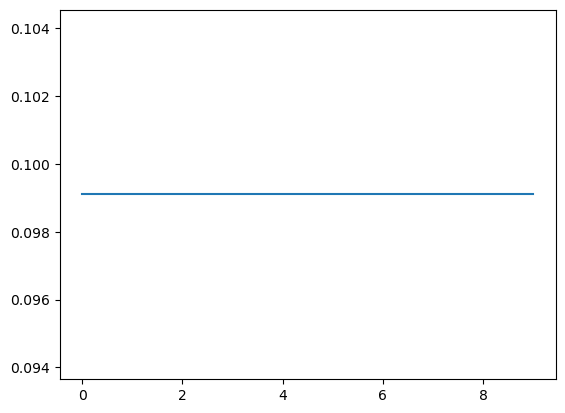

Predicted 980/10000 correct
Accuracy: 0.098


In [7]:
model = NeuralNetwork([784, 30, 16, 10], activation_function='relu')
evaluations = model.fit(X_train, y_train, X_val, y_val, 10, 2.0, 10)
plt.plot(range(len(evaluations)), evaluations)
plt.show()

# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

Epoch 0 done
Predicted 8955/10000
Epoch 1 done
Predicted 9159/10000
Epoch 2 done
Predicted 9281/10000
Epoch 3 done
Predicted 9352/10000
Epoch 4 done
Predicted 9389/10000
Epoch 5 done
Predicted 9431/10000
Epoch 6 done
Predicted 9465/10000
Epoch 7 done
Predicted 9481/10000
Epoch 8 done
Predicted 9509/10000
Epoch 9 done
Predicted 9541/10000
Epoch 10 done
Predicted 9542/10000
Epoch 11 done
Predicted 9564/10000
Epoch 12 done
Predicted 9584/10000
Epoch 13 done
Predicted 9598/10000
Epoch 14 done
Predicted 9575/10000
Epoch 15 done
Predicted 9586/10000
Epoch 16 done
Predicted 9617/10000
Epoch 17 done
Predicted 9625/10000
Epoch 18 done
Predicted 9616/10000
Epoch 19 done
Predicted 9612/10000
Epoch 20 done
Predicted 9626/10000
Epoch 21 done
Predicted 9622/10000
Epoch 22 done
Predicted 9644/10000
Epoch 23 done
Predicted 9647/10000
Epoch 24 done
Predicted 9646/10000
Epoch 25 done
Predicted 9654/10000
Epoch 26 done
Predicted 9652/10000
Epoch 27 done
Predicted 9657/10000
Epoch 28 done
Predicted 9655/1

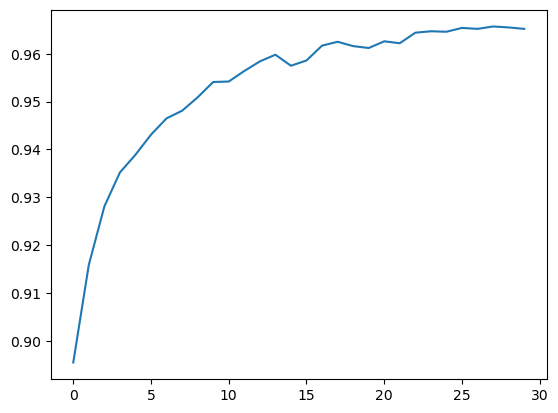

Predicted 9635/10000 correct
Accuracy: 0.9635


In [8]:
model = NeuralNetwork([784, 30, 16, 10], activation_function='leaky_relu')
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plt.plot(range(len(evaluations)), evaluations)
plt.show()

# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)

Epoch 0 done
Predicted 8764/10000
Epoch 1 done
Predicted 9008/10000
Epoch 2 done
Predicted 9140/10000
Epoch 3 done
Predicted 9213/10000
Epoch 4 done
Predicted 9257/10000
Epoch 5 done
Predicted 9283/10000
Epoch 6 done
Predicted 9314/10000
Epoch 7 done
Predicted 9327/10000
Epoch 8 done
Predicted 9359/10000
Epoch 9 done
Predicted 9384/10000
Epoch 10 done
Predicted 9389/10000
Epoch 11 done
Predicted 9409/10000
Epoch 12 done
Predicted 9411/10000
Epoch 13 done
Predicted 9418/10000
Epoch 14 done
Predicted 9425/10000
Epoch 15 done
Predicted 9441/10000
Epoch 16 done
Predicted 9455/10000
Epoch 17 done
Predicted 9455/10000
Epoch 18 done
Predicted 9463/10000
Epoch 19 done
Predicted 9477/10000
Epoch 20 done
Predicted 9479/10000
Epoch 21 done
Predicted 9477/10000
Epoch 22 done
Predicted 9484/10000
Epoch 23 done
Predicted 9491/10000
Epoch 24 done
Predicted 9512/10000
Epoch 25 done
Predicted 9507/10000
Epoch 26 done
Predicted 9513/10000
Epoch 27 done
Predicted 9492/10000
Epoch 28 done
Predicted 9520/1

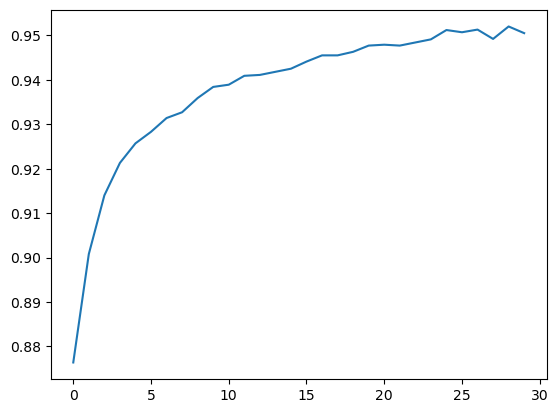

Predicted 9454/10000 correct
Accuracy: 0.9454


In [9]:
model = NeuralNetwork([784, 30, 16, 10], activation_function='tanh')
evaluations = model.fit(X_train, y_train, X_val, y_val, 30, 0.01, 10)
plt.plot(range(len(evaluations)), evaluations)
plt.show()

# PresistableModel(model).save('baseline-784-30-16-10')
# Treenaaminen on hidasta > pikkelöidään neuroverkon datan ja luodaan uudelleen.
# model = PresistableModel.load('baseline')

evalulate_model(model)